# ZMLP Search and Display

In [1]:
from zmlp import app_from_env
from zmlp.search import SimilarityQuery
from zw.display import show_asset, show_thumbnails
from zw.proxies import download_proxy
import pprint

## Connect

In [2]:
app = app_from_env()


## Display first 20 assets

In [5]:
search = app.assets.search({"size": 20, "query": { "term": {"system.state": "Analyzed" }}})

show_thumbnails(search)

## Look at one asset by index

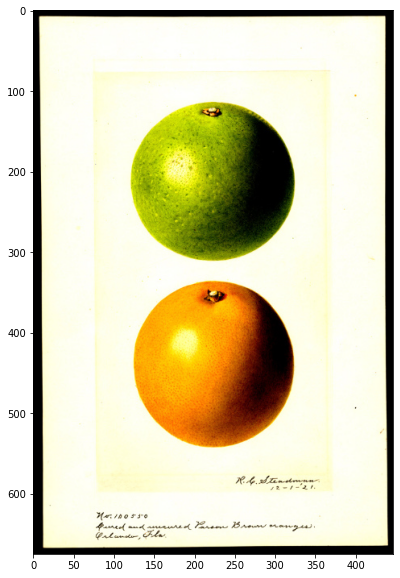

{'analysis': {'zvi': {'tinyProxy': ['#b2c713',
                                    '#0b1400',
                                    '#fffff9',
                                    '#fec94f',
                                    '#a94600',
                                    '#fffff4',
                                    '#ffffe6',
                                    '#ffffed',
                                    '#fffff3']},
              'zvi-image-similarity': {'simhash': 'CMPJJKAPDPCGPLCPAAGFPENEIPPIBPPEIGDFPCPPJIBFPPCLHIPPACPPPCAPCLDLEOPPPPPBPAECCPPMCPCPAPPPJPNGMPPPPHLDPPEABEPJNPMPPEPIDPGDHEPPJIPPPPMKFFHEPGPPPLPIPPMFLJJFPPPHPFMBHPBPLPKPHBNMNLBIPPHBPPPEPMPPMAPEFPHPCABPGDBPPIAPPLDPPPJPHPFBPBKFKPPAPDPFNMEPPPPIKCPPGABPPDPAPPDLJMPFPFBPCPPPPKCBPLPFPIBPNMPPPPIGPGPNFPPPPPCPPEANPEPPPKHINPDPAPPEPCPHDJPPPAPFAPCPKPPPCPCPGIMGDCPAPANPAECPIDGAPAPPPPIPDPKDOPAGBMAFNLKBKPBNPBPMOPLBPPKBGAPPGJPEGPPPBPDPCPPCBKEEDPAPOPJPJPPJAPBAFGOBPPIPBPOPPPPDPPBKDABPHFDPPPGKMPCPPPAELDPPPBHPBDPKPPCPPEAGKPPKKMPMMAAPDPPPPPAA

In [6]:
asset = search[17]

show_asset(asset)

pprint.pprint(asset.document)

## Do a similarity search

In [7]:
h = asset.document['analysis']['zvi-image-similarity']['simhash']

min_score = 0.75

q = {
    "query": {
        "bool": {
            "must": [
                SimilarityQuery(h)
            ]
        }
    }
}



search = app.assets.search(q)

show_thumbnails(search)